# Análise Exploratória dos Dados

## Importando pacotes e Bibliotecas

In [ ]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Link para o dataset principal

[Dataset principal - main.ipynb](./main.ipynb)

## Importando os Datasets

In [ ]:
df_iris_raw = pd.read_csv("./databases/raw/Iris.csv", sep = ",", index_col = "Id")
df_titanic_processed = pd.read_csv("./databases/raw/titanic.csv", sep = ",", index_col = "PassengerId")

## Breve apresentacao dos datasets

In [ ]:
df_iris_raw.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
118,7.7,3.8,6.7,2.2,Iris-virginica
68,5.8,2.7,4.1,1.0,Iris-versicolor
141,6.7,3.1,5.6,2.4,Iris-virginica
107,4.9,2.5,4.5,1.7,Iris-virginica
18,5.1,3.5,1.4,0.3,Iris-setosa
133,6.4,2.8,5.6,2.2,Iris-virginica
90,5.5,2.5,4.0,1.3,Iris-versicolor
33,5.2,4.1,1.5,0.1,Iris-setosa


In [ ]:
df_titanic_processed.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
df_iris_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df_titanic_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## AED

### Dataset Iris

In [ ]:
df_frequencia_distribuicao_especies = pd.crosstab(index = df_iris_raw["Species"], columns = "quantidade")
df_frequencia_distribuicao_especies

col_0,quantidade
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#### Separando as especies em datasets especificos

In [ ]:
df_setosa = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-setosa"]
df_versicolor = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-versicolor"]
df_virginica = df_iris_raw.loc[df_iris_raw["Species"] == "Iris-virginica"]

#### Imprimindo os gráficos

##### Histograma

<Figure size 2000x1200 with 0 Axes>

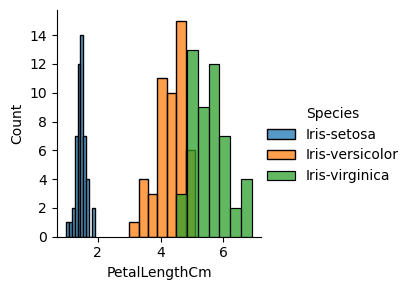

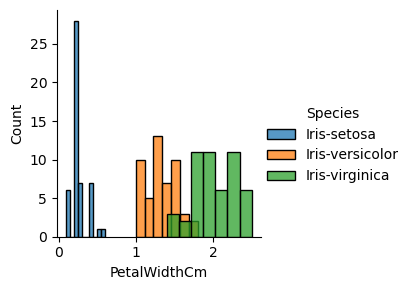

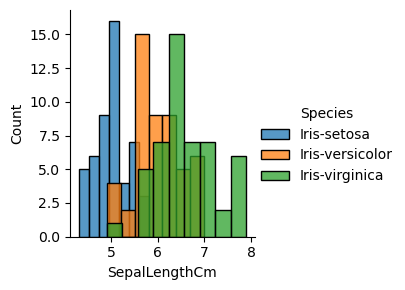

In [ ]:
plt.figure(figsize = (20, 12))

sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "PetalLengthCm").add_legend()
sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "PetalWidthCm").add_legend()
sns.FacetGrid(df_iris_raw, hue = "Species", height = 3).map(sns.histplot, "SepalLengthCm").add_legend()

plt.show()

##### Boxplot

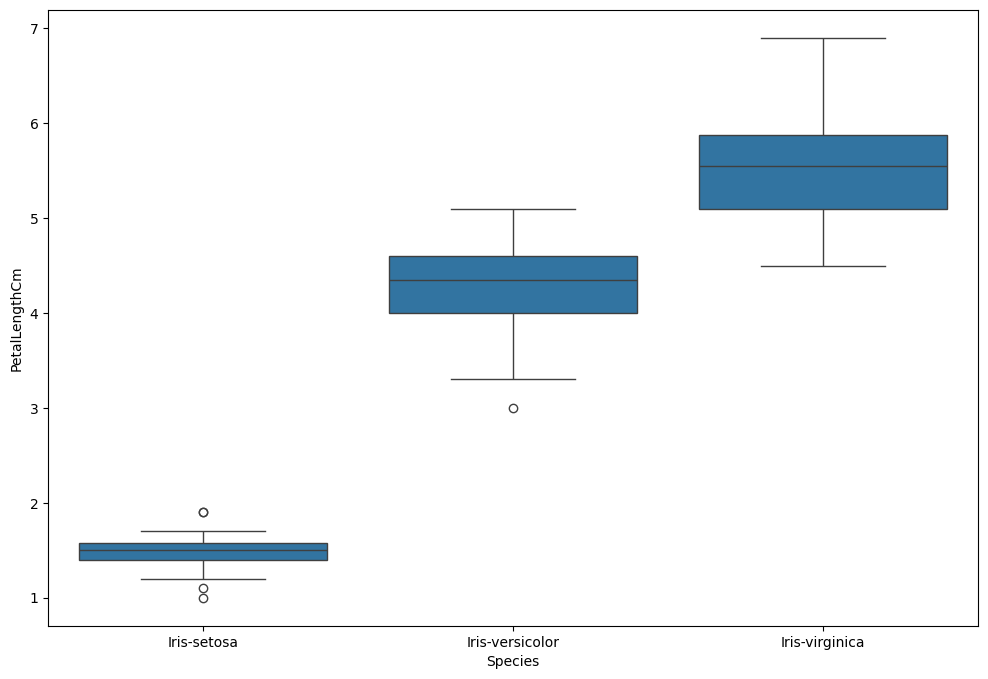

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = df_iris_raw, x = "Species", y = "PetalLengthCm")

plt.show()

##### Violinplot

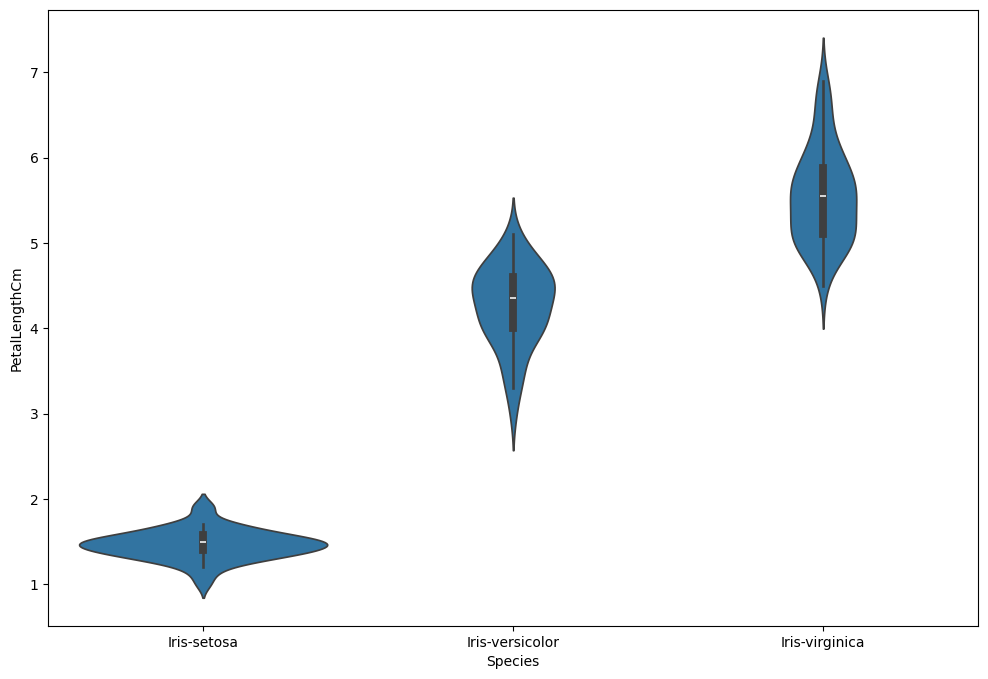

In [ ]:
plt.figure(figsize = (12, 8))

sns.violinplot(data = df_iris_raw, x = "Species", y = "PetalLengthCm")

plt.show()

##### Gráfico de dispersão

<Figure size 2000x1200 with 0 Axes>

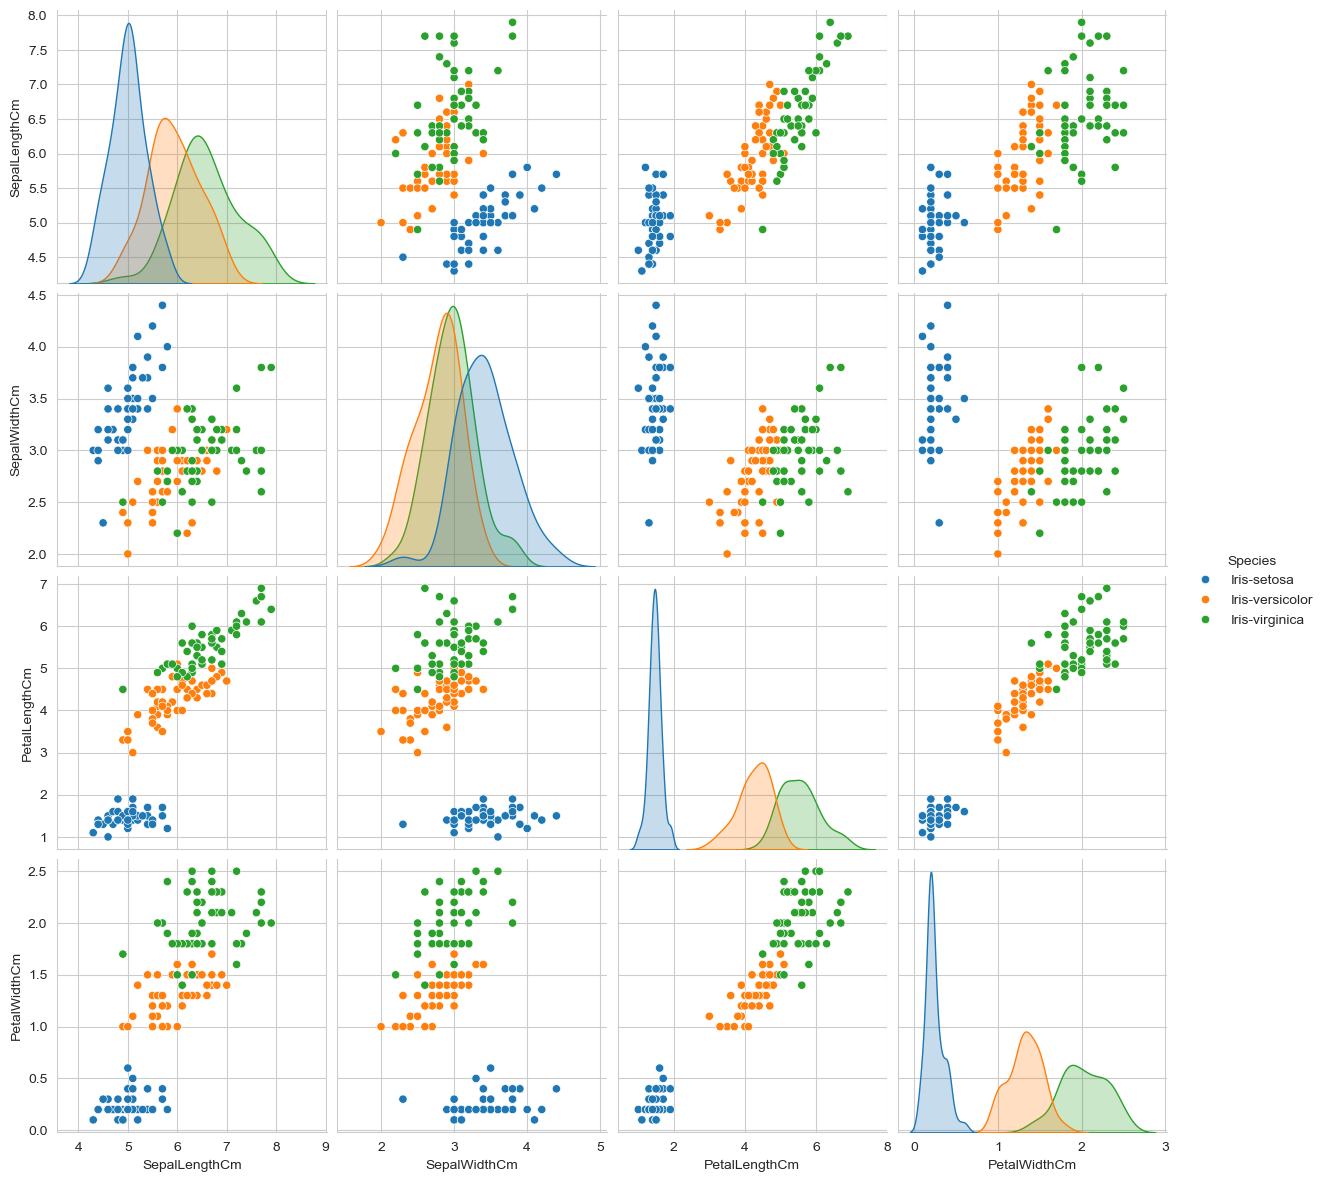

In [ ]:
plt.figure(figsize = (20, 12))

sns.set_style("whitegrid")
sns.pairplot(df_iris_raw, hue = "Species", height = 3)

plt.show()

### Dataset Titanic

In [ ]:
df_frequencia_distribuicao_classes = pd.crosstab(index = df_titanic_processed["Pclass"], columns = "quantidade")
df_frequencia_distribuicao_classes

col_0,quantidade
Pclass,
1,491
2,491
3,491


#### Separando as classes em datasets especificos

In [ ]:
df_Pclass_1 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 1]
df_Pclass_2 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 2]
df_Pclass_3 = df_titanic_processed.loc[df_titanic_processed["Pclass"] == 3]

#### Imprimindo os gráficos

##### Histograma

<Figure size 2000x1200 with 0 Axes>

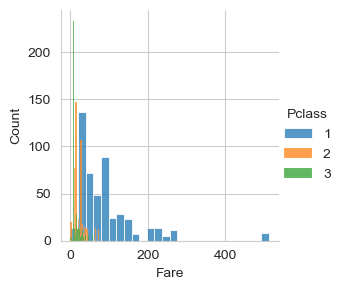

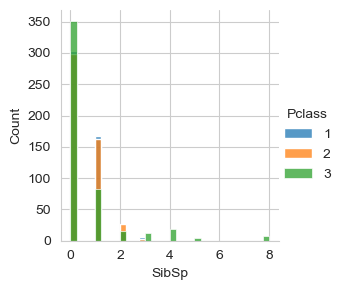

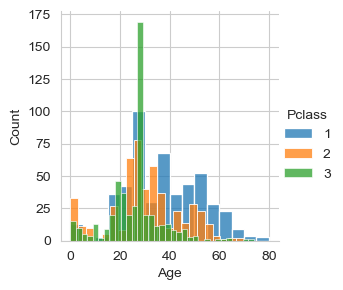

In [ ]:
plt.figure(figsize = (20, 12))

sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "Fare").add_legend()
sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "SibSp").add_legend()
sns.FacetGrid(df_titanic_processed, hue = "Pclass", height = 3).map(sns.histplot, "Age").add_legend()

plt.show()

##### Boxplot

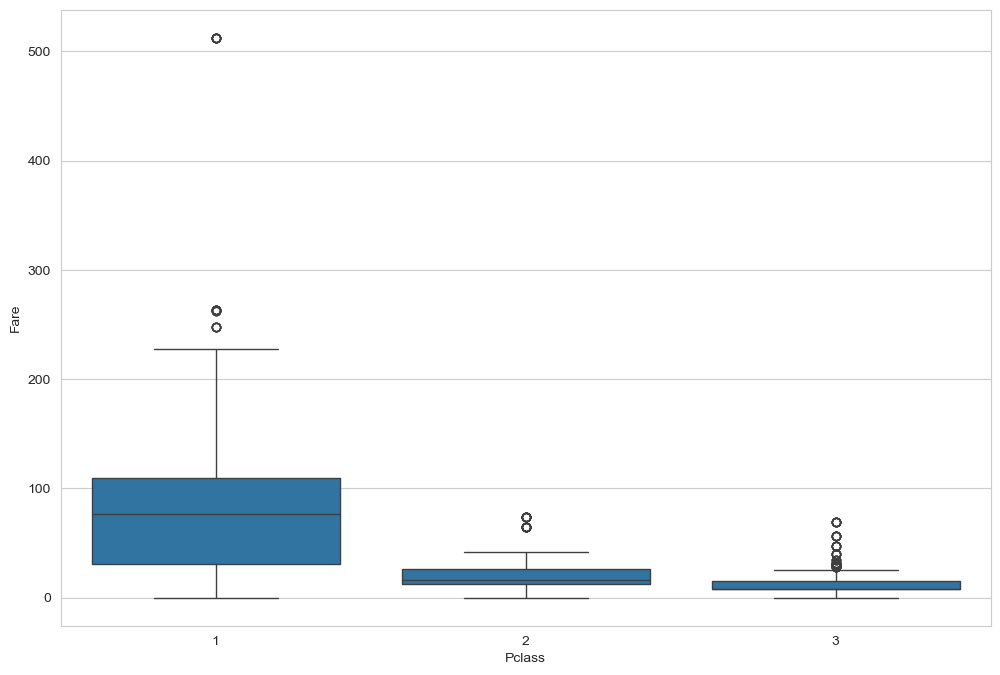

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = df_titanic_processed, x = "Pclass", y = "Fare")

plt.show()

##### Violinplot

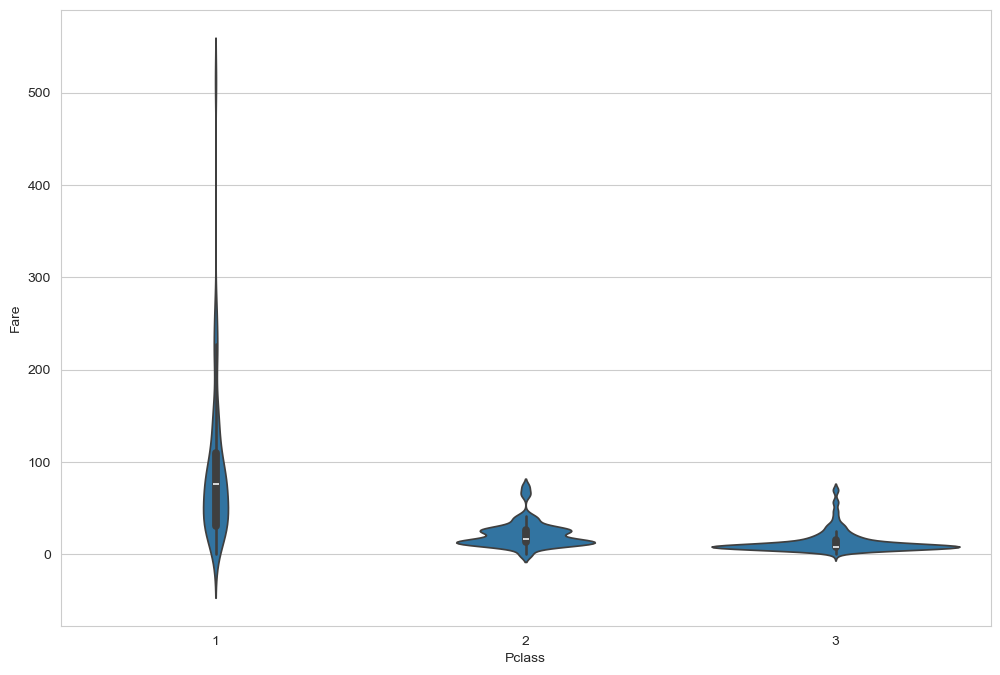

In [ ]:
plt.figure(figsize = (12, 8))

sns.violinplot(data = df_titanic_processed, x = "Pclass", y = "Fare")

plt.show()

##### Gráfico de dispersão

<Figure size 2000x1200 with 0 Axes>

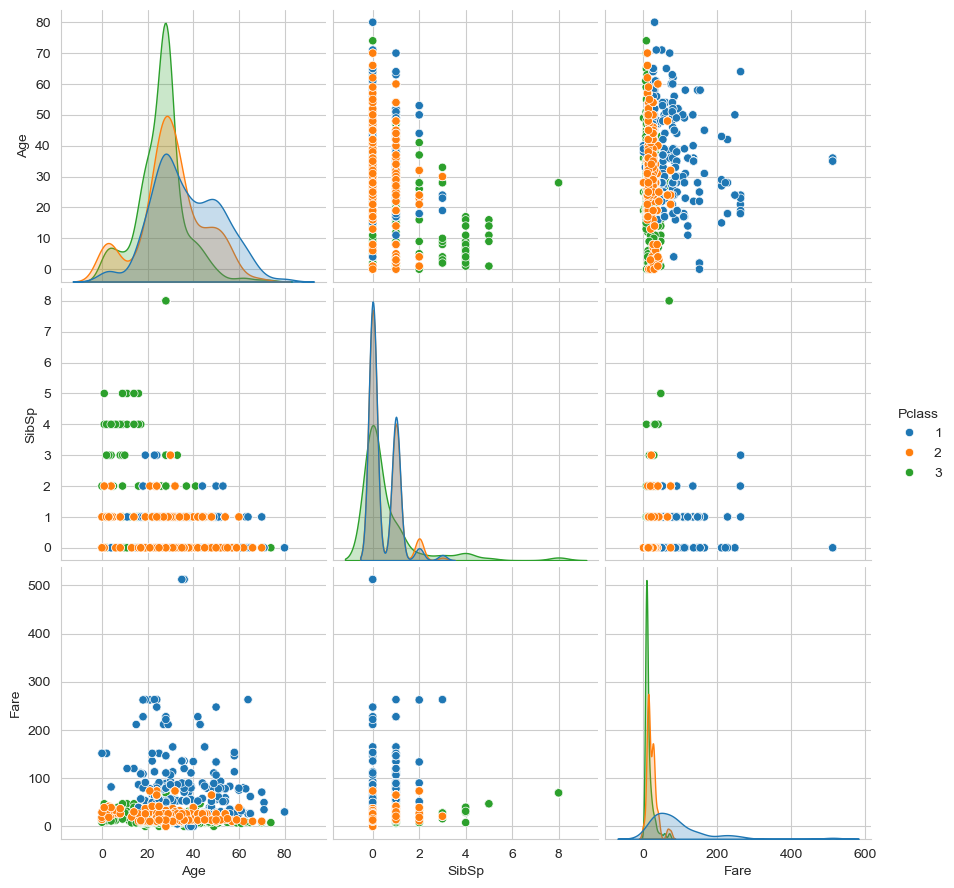

In [ ]:
plt.figure(figsize = (20, 12))

sns.set_style("whitegrid")
sns.pairplot(df_titanic_processed, hue = "Pclass", height = 3)

plt.show()